In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st

import seaborn as sns
import gc

In [2]:
#Getting the data

raw_data = pd.read_csv(r"C:\Users\katar\OneDrive\Dokumenty\Edukacja\Data Science\6_DS_Project\Project\02_Data\Fraud.csv")

#### Content
Data for the case is available in CSV format having 6362620 rows and 10 columns.

#### Data Dictionary:

*step* - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

*type* - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

*amount* - amount of the transaction in local currency.

*nameOrig* - customer who started the transaction

*oldbalanceOrg* - initial balance before the transaction

*newbalanceOrig* - new balance after the transaction

*nameDest* - customer who is the recipient of the transaction

*oldbalanceDest* - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

*newbalanceDest* - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

*isFraud* - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

*isFlaggedFraud* - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
raw_data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
raw_data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000,6362620.00000
mean,243.39725,179861.90355,833883.10407,855113.66858,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,603858.23146,2888242.67301,2924048.50297,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,156.00000,13389.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,239.00000,74871.94000,14208.00000,0.00000,132705.66500,214661.44000,0.00000,0.00000
75%,335.00000,208721.47750,107315.17500,144258.41000,943036.70750,1111909.25000,0.00000,0.00000
max,743.00000,92445516.64000,59585040.37000,49585040.37000,356015889.35000,356179278.92000,1.00000,1.00000


### Conclusions:
- the dataset consists of 6 362 620 transactions and 11 columns
- $isFraud$ is the target value
- there are no missig values
- both numeric and categorical variable are present 


In [6]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(raw_data)

,Outlier_percentage
oldbalanceOrg,17.485045
newbalanceOrig,16.555931
oldbalanceDest,12.355523
newbalanceDest,11.607278
amount,5.313503
step,1.613926
isFraud,0.129082
isFlaggedFraud,0.000251


In [7]:
raw_data.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

### Conclusions:
- there is much more not fraud cases -> we will need to check closer the accuracy metrix for the fraud class. 

Only by predicting all transactions as non fraud -> the accuracy will be over 0,99!

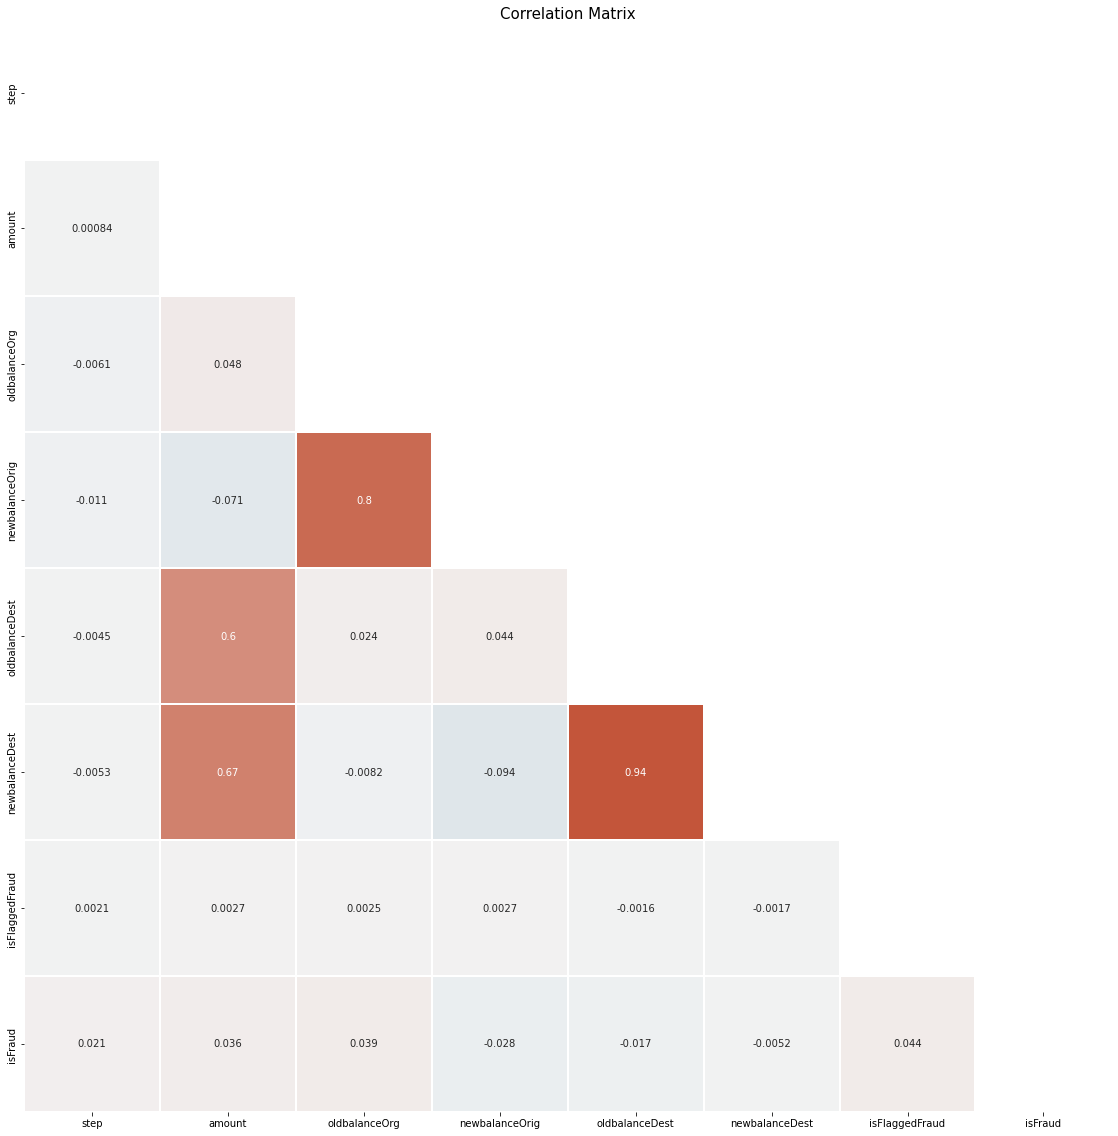

In [8]:
features = [
    'step', 'type', 'amount', 'nameOrig','oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
    'newbalanceDest', 'isFlaggedFraud', 'isFraud'
]

correlation_matrix = raw_data[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

Note:
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

### Conclusions:
- there are two pars of features which show very high correlation: $oldbalanceOrg$ with $newbalanceOrig$ and $oldbalanceDest$ with $newbalanceDest$. Both are unsuprising.
- there is no strong correlation between target $isFraud$ and any of the other features. (same for both methods pearson and spearman correlation) 

Text(0.5, 1.0, 'Type')

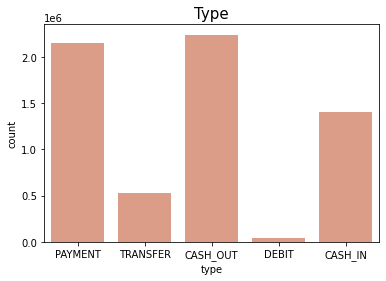

In [15]:
df = raw_data[raw_data['isFraud'] == 1]

fig,ax=plt.subplots()
sns.countplot(x='type',data=raw_data, color="darksalmon").set_title('Type',size=15)


#sns.violinplot(data=df, x="amount", y="isFraud", ax=ax)

In [10]:
print('a')

a
